# Support Vector Regression

## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Load the dataset

In [2]:
df = pd.read_csv("/Users/omkarmutreja/Downloads/SVR/Position_Salaries.csv")
print(df.head())
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values
print(X.shape)
print(y.shape)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
(10, 1)
(10,)


## Feature Scaling

In [3]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(X)

/Users/omkarmutreja/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting SVR to the dataset

In [4]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X,y)
y_pred = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

/Users/omkarmutreja/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.29047426])

## Visualizing the SVR results

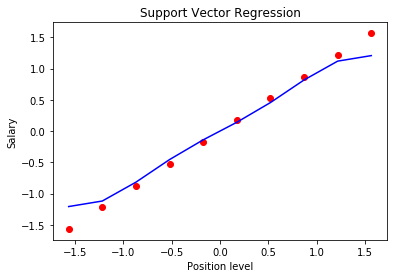

In [5]:
plt.scatter(X,y,c='red')
plt.plot(X,svr_reg.predict(X),c='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing the results for higher resolution and smoother curve

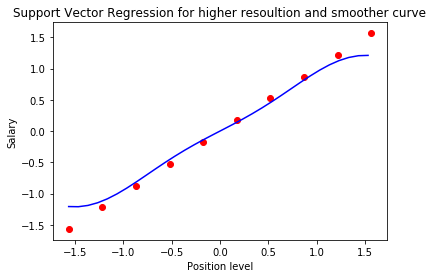

In [6]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,c='red')
plt.plot(X_grid,svr_reg.predict(X_grid),c='blue')
plt.title('Support Vector Regression for higher resoultion and smoother curve')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [7]:
# In the above graph, the curve is more smooth as it covers more data points(i.e. 1.1,1.2,...,6.7,6.8,...)